In [1]:

import re

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
from statsmodels.stats.weightstats import ztest
from scipy.stats import ttest_rel
from scipy.stats import ttest_ind
from scipy.stats import norm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import f_oneway, f
import statsmodels.api as sm
from statsmodels.formula.api import ols

import warnings
warnings.simplefilter('ignore')

#uniqueValues = df['Category'].unique()
#print('Unique elements in column ')
#print(uniqueValues)

In [2]:
df = pd.read_csv('C:/Users/Pablo Gonzalez Uzeta/Desktop/IT Salary Survey EU  2020.csv')

In [3]:
df = df.drop(columns = ['Annual bonus+stocks one year ago. Only answer if staying in same country',
                        'Have you lost your job due to the coronavirus outbreak?', 
                        'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week',
                        'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR',
                        'Timestamp','Years of experience in Germany',
                        'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country',
                        'Annual bonus+stocks one year ago. Only answer if staying in same country','Yearly bonus + stocks in EUR'])

In [4]:
df['Total years of experience'] = df['Total years of experience'].str.extract('(\d+)', expand=False)

In [5]:
df.dropna(inplace=True)

In [6]:
df = df.astype({"Total years of experience": int})

In [7]:
df['Gender'] = df['Gender'].str.replace('Male', '0')
df['Gender'] = df['Gender'].str.replace('Female', '1')
df['Gender'] = df['Gender'].str.replace('Diverse', '2')
df = df.astype({"Gender": int})

In [8]:
df['Your main technology / programming language'] = df['Your main technology / programming language'].str.replace(', React', '')
df['Your main technology / programming language'] = df['Your main technology / programming language'].str.replace('/ JavaScript (React)', '')
df['Your main technology / programming language'] = df['Your main technology / programming language'].str.replace('Kuberenetes,', '')
df['Your main technology / programming language'] = df['Your main technology / programming language'].str.replace(', Java', '')
df['Your main technology / programming language'] = df['Your main technology / programming language'].str.replace('Angular,', '')
df['Your main technology / programming language'] = df['Your main technology / programming language'].str.replace('/ Python', '')
df['Your main technology / programming language'] = df['Your main technology / programming language'].str.replace('Java/', '')
df['Your main technology / programming language'] = df['Your main technology / programming language'].str.replace('(React)', '')
df['Your main technology / programming language'] = df['Your main technology / programming language'].str.replace('/TS', '')
df['Your main technology / programming language'] = df['Your main technology / programming language'].str.replace('Java/', '')
df['Your main technology / programming language'] = df['Your main technology / programming language'].str.replace('C/', '')
df['Your main technology / programming language'] = df['Your main technology / programming language'].str.replace('Python /', '')
df['Your main technology / programming language'] = df['Your main technology / programming language'].str.replace('(', '')
df['Your main technology / programming language'] = df['Your main technology / programming language'].str.replace(')', '')
df['Your main technology / programming language'] = df['Your main technology / programming language'].str.replace('python', 'Python')
df['Your main technology / programming language'] = df['Your main technology / programming language'].str.replace(' ', '')
df['Your main technology / programming language'] = df['Your main technology / programming language'].str.replace('Typescript', 'TypeScript')
df['Your main technology / programming language'] = df['Your main technology / programming language'].str.replace('.NET', '.Net')
df['Your main technology / programming language'] = df['Your main technology / programming language'].str.replace('Kubrrnetes', 'Kubernetes')
df['Your main technology / programming language'] = df['Your main technology / programming language'].str.replace('.net', '.Net')
df['Your main technology / programming language'] = df['Your main technology / programming language'].str.replace('javascript', 'JavaScript')
df['Your main technology / programming language'] = df['Your main technology / programming language'].str.replace('Azure,', '')
df['Your main technology / programming language'] = df['Your main technology / programming language'].str.replace('JS', 'NodeJS')
df['Your main technology / programming language'] = df['Your main technology / programming language'].str.replace('js', 'NodeJS')
df['Your main technology / programming language'] = df['Your main technology / programming language'].str.replace('php', 'PHP')
df['Your main technology / programming language'] = df['Your main technology / programming language'].str.replace('Kube.Netes', 'Kubernetes')
df['Your main technology / programming language'] = df['Your main technology / programming language'].str.replace('&PHP', '')
df['Your main technology / programming language'] = df['Your main technology / programming language'].str.replace('Embedded', 'C++')
df['Your main technology / programming language'] = df['Your main technology / programming language'].str.replace('NodeNodeNodeNodeNodeJS', 'NodeJS')
df['Your main technology / programming language'] = df['Your main technology / programming language'].str.replace('NodeNodeNodeNodeNodeNodeJS', 'NodeJS')
df['Your main technology / programming language'] = df['Your main technology / programming language'].str.replace('NodeNodeNodeNodeNodeJS', 'NodeJS')
df['Your main technology / programming language'] = df['Your main technology / programming language'].str.replace('NodeNodeJS', 'NodeJS')
df['Your main technology / programming language'] = df['Your main technology / programming language'].apply(lambda x: str(x).replace('C++C++', 'C++') if 'C++C++' in str(x) else x)
df['Your main technology / programming language'] = df['Your main technology / programming language'].apply(lambda x: str(x).replace('NodeNodeJS', 'NodeJS') if 'm' in str(x) else x)
df['Your main technology / programming language'] = df['Your main technology / programming language'].str.replace('Golang', 'GO')


In [9]:
print(df.columns)

Index(['Age', 'Gender', 'City', 'Position ', 'Total years of experience',
       'Seniority level', 'Your main technology / programming language',
       'Other technologies/programming languages you use often',
       'Yearly brutto salary (without bonus and stocks) in EUR',
       'Number of vacation days', 'Employment status', 'Сontract duration',
       'Main language at work', 'Company size', 'Company type'],
      dtype='object')


In [10]:
df.head()

,Age,Gender,City,Position,Total years of experience,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,Yearly brutto salary (without bonus and stocks) in EUR,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type
0,26.0,0,Munich,Software Engineer,5,Senior,TypeScript,"Kotlin, Javascript / Typescript",80000.0,30,Full-time employee,Unlimited contract,English,51-100,Product
2,29.0,0,Berlin,Software Engineer,12,Lead,Javascript/TypeScript,"Javascript / Typescript, Docker",120000.0,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product
4,37.0,0,Berlin,Backend Developer,17,Senior,C#.Net,".NET, SQL, AWS, Docker",62000.0,29,Full-time employee,Unlimited contract,English,101-1000,Product
5,32.0,0,Berlin,DevOps,5,Senior,"AWS,GCP,Python,K8s","Python, AWS, Google Cloud, Kubernetes, Docker",76000.0,30,Full-time employee,Unlimited contract,English,11-50,Startup
7,24.0,0,Berlin,Frontend Developer,5,Senior,TypeScript,Javascript / Typescript,65000.0,27,Full-time employee,Unlimited contract,English,1000+,Product


In [11]:
df['Company size'] = df['Company size'].str.replace('51-100', '75')
df['Company size'] = df['Company size'].str.replace('101-1000', '500')
df['Company size'] = df['Company size'].str.replace('11-50', '25')
df['Company size'] = df['Company size'].str.replace('1000+', '5000')
df['Company size'] = df['Company size'].str.replace('up to 10', '9')
df['Company size'] = df['Company size'].str.replace('+', '')


In [12]:
df = df.astype({"Company size": int})

In [13]:
df.rename(columns={'Yearly brutto salary (without bonus and stocks) in EUR':'Salary'}, inplace=True)

In [72]:
df.head()

,Age,Gender,City,Position,Total years of experience,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,Salary,Number of vacation days,...,NLP,Openstack,PS,BI,GCP,PL,scala,Magento,JavaBackend,Qlik
0,26.0,0,Munich,Software Engineer,5,Senior,TypeScript,"Kotlin, Javascript / Typescript",80000.0,30,...,0,0,0,0,0,0,0,0,0,0
2,29.0,0,Berlin,Software Engineer,12,Lead,JavaScript,"Javascript / Typescript, Docker",120000.0,30,...,0,0,0,0,0,0,0,0,0,0
4,37.0,0,Berlin,Backend Developer,17,Senior,.Net,".NET, SQL, AWS, Docker",62000.0,29,...,0,0,0,0,0,0,0,0,0,0
5,32.0,0,Berlin,DevOps,5,Senior,AWS,"Python, AWS, Google Cloud, Kubernetes, Docker",76000.0,30,...,0,0,0,0,0,0,0,0,0,0
7,24.0,0,Berlin,Frontend Developer,5,Senior,TypeScript,Javascript / Typescript,65000.0,27,...,0,0,0,0,0,0,0,0,0,0


In [73]:
Excel_ready = df.copy()

In [74]:
def cleaned_data_xlsx(dt):
    dt.to_excel('Euro_salary.xlsx')
    
cleaned_data_xlsx(Excel_ready)

In [14]:
formula = ' Salary ~ C(df["Your main technology / programming language"]) + C(df["Seniority level"]) + C(City)'

modelo = ols(formula=formula, data=df).fit()

anova_table = sm.stats.anova_lm(modelo, typ=3)

anova_table

,sum_sq,df,F,PR(>F)
Intercept,4.358447e+09,1.0,3.993269,4.608067e-02
"C(df[""Your main technology / programming language""])",9.708324e+10,172.0,0.517145,9.999998e-01
"C(df[""Seniority level""])",1.184670e+11,14.0,7.752937,2.371366e-15
C(City),8.508097e+10,104.0,0.749542,9.664012e-01
Residual,7.410935e+11,679.0,NaN,NaN


In [15]:
df['Your main technology / programming language'].str.split("/")

0                   [TypeScript]
2       [Javascript, TypeScript]
4                       [C#.Net]
5           [AWS,GCP,Python,K8s]
7                   [TypeScript]
                  ...           
1247                       [PHP]
1248                      [Java]
1250                       [PHP]
1251                [JavaScript]
1252                      [yaml]
Name: Your main technology / programming language, Length: 955, dtype: object

In [16]:
df['Your main technology / programming language'] = df['Your main technology / programming language'].apply(lambda x: re.sub("[/&]",",",x))


In [17]:
df['Your main technology / programming language'] = df['Your main technology / programming language'].str.split(",")

In [18]:
df['Your main technology / programming language'] = df['Your main technology / programming language'].apply(lambda x: x[0])

In [19]:
df['Your main technology / programming language'] = df['Your main technology / programming language'].str.replace('sql', 'SQL')
df['Your main technology / programming language'] = df['Your main technology / programming language'].str.replace('Sql', 'SQL')
df['Your main technology / programming language'] = df['Your main technology / programming language'].str.replace('NodsJs', 'NodeJS')
df['Your main technology / programming language'] = df['Your main technology / programming language'].str.replace('c#', 'C#')
df['Your main technology / programming language'] = df['Your main technology / programming language'].str.replace('C#.Net', '.Net')
df['Your main technology / programming language'] = df['Your main technology / programming language'].str.replace('Javascript', 'JavaScript')

In [20]:
uniqueValues = df['Your main technology / programming language'].unique()

In [21]:
uni1 = [val for val in uniqueValues if val != ''] 
unico = [val for val in uni1 if val != '-'] 

In [22]:
df[unico] = 0

In [23]:
for tec in unico: 
    df[tec] = df['Your main technology / programming language'].apply(lambda x:1 if tec in x else 0)

In [24]:
#df.loc[:,['Your main technology / programming language', *unico]]

In [25]:
#vale = df['Your main technology / programming language'].value_counts()
#vale = vale[0:5]
#vale.head()

In [26]:
new = df[['Employment status','Сontract duration','Main language at work','Seniority level','City']]

In [27]:
df_categ_dummies = pd.get_dummies(new)

In [28]:
df_categ_dummies.head()

,Employment status_Founder,Employment status_Full-time employee,Employment status_Part-time employee,Employment status_Self-employed (freelancer),Employment status_Werkstudent,Employment status_Working Student,"Employment status_full-time, but 32 hours per week (it was my request, I'm a student)",Employment status_working student,Сontract duration_0,Сontract duration_Temporary contract,...,City_Utrecht,City_Vienna,City_Walldorf,City_Warsaw,"City_Warsaw, Poland",City_Wolfsburg,City_Wroclaw,City_Würzburg,City_Zurich,City_warsaw
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
concatenar = df[['Salary','Company size','Python','Java','JavaScript','PHP','C++','Age', 'Gender','Total years of experience']]

In [30]:
concatenar.head() 

,Salary,Company size,Python,Java,JavaScript,PHP,C++,Age,Gender,Total years of experience
0,80000.0,75,0,0,0,0,0,26.0,0,5
2,120000.0,500,0,1,1,0,0,29.0,0,12
4,62000.0,500,0,0,0,0,0,37.0,0,17
5,76000.0,25,0,0,0,0,0,32.0,0,5
7,65000.0,5000,0,0,0,0,0,24.0,0,5


In [31]:
print(df_categ_dummies.shape)
print(concatenar.shape)

(955, 144)
(955, 10)


In [32]:
#merge new and concatenar

In [33]:
columnas_numericas = pd.concat([concatenar,df_categ_dummies], axis=1)

In [34]:
print(columnas_numericas.columns)

Index(['Salary', 'Company size', 'Python', 'Java', 'JavaScript', 'PHP', 'C++',
       'Age', 'Gender', 'Total years of experience',
       ...
       'City_Utrecht', 'City_Vienna', 'City_Walldorf', 'City_Warsaw',
       'City_Warsaw, Poland', 'City_Wolfsburg', 'City_Wroclaw',
       'City_Würzburg', 'City_Zurich', 'City_warsaw'],
      dtype='object', length=154)


In [35]:
df_num = columnas_numericas.copy()
corr = df_num.corr()

In [36]:
corr.head()

,Salary,Company size,Python,Java,JavaScript,PHP,C++,Age,Gender,Total years of experience,...,City_Utrecht,City_Vienna,City_Walldorf,City_Warsaw,"City_Warsaw, Poland",City_Wolfsburg,City_Wroclaw,City_Würzburg,City_Zurich,City_warsaw
Salary,1.000000,0.071196,-0.056275,-0.015445,-0.044570,-0.059327,0.001631,0.194983,-0.133702,0.288709,...,-0.022917,0.007550,0.007550,-0.036246,-0.018347,-0.036468,-0.034342,0.002790,0.094511,-0.021013
Company size,0.071196,1.000000,0.034263,-0.042268,-0.055947,-0.099047,0.101744,-0.013418,0.057903,0.003749,...,0.042717,0.042717,0.042717,-0.028213,-0.027275,-0.030046,0.042717,-0.021235,-0.020652,-0.021235
Python,-0.056275,0.034263,1.000000,-0.294286,-0.151063,-0.128804,-0.108643,-0.081587,0.016105,-0.216527,...,0.063917,-0.016400,0.063917,-0.016400,-0.016400,-0.023205,-0.016400,-0.016400,0.007370,0.063917
Java,-0.015445,-0.042268,-0.294286,1.000000,0.513320,-0.147733,-0.124609,0.010347,0.037295,0.009934,...,-0.018810,0.055727,-0.018810,-0.018810,-0.018810,0.026118,-0.018810,0.055727,-0.037679,-0.018810
JavaScript,-0.044570,-0.055947,-0.151063,0.513320,1.000000,-0.075834,-0.063964,-0.073741,0.023100,-0.098284,...,-0.009655,-0.009655,-0.009655,-0.009655,-0.009655,-0.013662,-0.009655,-0.009655,-0.019341,-0.009655


In [37]:
def mapa_de_calor(corr):
  """Gráfica un mapa de calor de correlaciones escondiendo
  el triángulo superior."""
  mask = np.zeros_like(corr)
  mask[np.triu_indices_from(mask)] = True
  with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(100, 50)) #25,10
    sns.heatmap(round(corr, 2), annot=True, ax=ax, cmap='coolwarm',
                fmt='.2f', linewidths=0.5, mask=mask)
    fig.subplots_adjust(top=0.93)
    fig.suptitle('Mapa de Correlaciones')

In [38]:
n_columnas = 153
columnas = corr.nlargest(n_columnas, 'Salary')['Salary'].index

In [39]:
correlaciones = df_num[columnas].corr()

In [40]:
#corr_final = corr.drop(columns = corr.columns[(corr <= 0.10).any()])

In [41]:
#corr_final

In [42]:
#fin = correlaciones[correlaciones['Salary'] <= 0.10] 
correlaciones.drop(correlaciones[correlaciones['Salary'] <= 0.10].index, inplace = True)

In [43]:
correlaciones.shape

(11, 153)

In [44]:
columnas_pasar = correlaciones.index

In [45]:
columnas_pasar

Index(['Salary', 'Total years of experience', 'Age', 'Seniority level_Lead',
       'Employment status_Self-employed (freelancer)', 'Seniority level_Head',
       'Сontract duration_0', 'Seniority level_CTO', 'Seniority level_Senior',
       'City_Berlin', 'Main language at work_English'],
      dtype='object')

In [46]:
df_num[columnas_pasar]

,Salary,Total years of experience,Age,Seniority level_Lead,Employment status_Self-employed (freelancer),Seniority level_Head,Сontract duration_0,Seniority level_CTO,Seniority level_Senior,City_Berlin,Main language at work_English
0,80000.0,5,26.0,0,0,0,0,0,1,0,1
2,120000.0,12,29.0,1,1,0,0,0,0,1,1
4,62000.0,17,37.0,0,0,0,0,0,1,1,1
5,76000.0,5,32.0,0,0,0,0,0,1,1,1
7,65000.0,5,24.0,0,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1247,108500.0,7,34.0,0,0,0,0,0,1,0,1
1248,70000.0,9,31.0,0,0,0,0,0,1,1,1
1250,110000.0,15,39.0,1,0,0,0,0,0,0,1
1251,38350.0,7,26.0,0,0,0,0,0,0,0,0


In [47]:
X = df_num[columnas_pasar].drop(columns='Salary') 

In [48]:
y = df_num[['Salary']]

In [49]:
X

,Total years of experience,Age,Seniority level_Lead,Employment status_Self-employed (freelancer),Seniority level_Head,Сontract duration_0,Seniority level_CTO,Seniority level_Senior,City_Berlin,Main language at work_English
0,5,26.0,0,0,0,0,0,1,0,1
2,12,29.0,1,1,0,0,0,0,1,1
4,17,37.0,0,0,0,0,0,1,1,1
5,5,32.0,0,0,0,0,0,1,1,1
7,5,24.0,0,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...
1247,7,34.0,0,0,0,0,0,1,0,1
1248,9,31.0,0,0,0,0,0,1,1,1
1250,15,39.0,1,0,0,0,0,0,0,1
1251,7,26.0,0,0,0,0,0,0,0,0


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

In [51]:
print(X_train.shape) #todas tiene que tener el mismo numero de columnas 
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(764, 10)
(191, 10)
(764, 1)
(191, 1)


In [52]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [53]:
model.intercept_

array([35743.74388751])

In [54]:
print(model.coef_)

[[ 7.38114971e+02  2.71748668e+02  2.25868684e+04  3.58040833e+04
   4.04712946e+04  3.63797881e-11 -3.81987775e-11  1.39536088e+04
   5.22944673e+03  7.41920966e+03]]


In [55]:
# vamos a hacer la prediccion de nuestro conjunto de entrenamiento 
y_train_predict = model.predict(X_train)

In [56]:
y_train_predict

array([[ 79807.20177977],
       [ 77141.50388551],
       [ 77321.10819975],
       [ 73465.41812913],
       [ 88804.35439675],
       [ 64904.36913067],
       [ 68508.96191033],
       [ 73660.03576421],
       [ 79174.43577005],
       [ 78617.73382697],
       [115441.24940632],
       [ 97574.14138499],
       [ 84948.66432612],
       [ 46499.78410462],
       [ 46499.78410462],
       [ 59240.06062552],
       [103012.69484793],
       [ 69077.08387433],
       [ 76131.64024695],
       [ 77721.77668432],
       [ 59614.80679841],
       [ 67304.48063669],
       [ 86784.62711964],
       [ 83744.18305249],
       [ 74927.15897332],
       [ 57336.5354609 ],
       [ 56934.09558331],
       [ 80909.2097719 ],
       [ 54914.3683062 ],
       [ 58759.20522535],
       [ 74203.53309986],
       [ 46499.78410462],
       [ 73722.67769968],
       [ 79314.20873827],
       [ 51820.85096522],
       [ 91290.44797677],
       [ 65258.88688727],
       [ 80339.84596394],
       [ 473

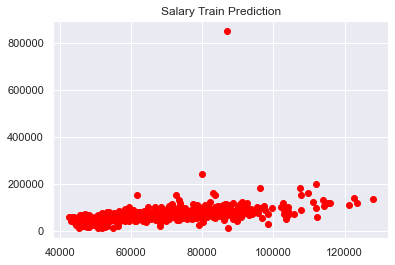

In [57]:
sns.set()
plt.scatter(y_train_predict, y_train, c='red')
plt.title('Salary Train Prediction')
plt.show();

In [58]:
y_train.values.flatten()

array([ 75000.,  75000., 115000.,  75000.,  65000.,  60000.,  75000.,
        80000.,  90000.,  74000., 120000.,  90000.,  62000.,  48000.,
        65000.,  75000.,  90000.,  60000.,  56000.,  72000., 100000.,
        65000.,  82000.,  56000.,  75000.,  65000.,  47000.,  75000.,
        11500.,  58000.,  65000.,  20000.,  69000.,  67000.,  49000.,
       100000.,  70000.,  36000.,  37500.,  80000., 100000.,  63000.,
       100000.,  45600.,  82000.,  75000.,  65000.,  35000.,  65000.,
       180000.,  13000.,  78000.,  47745.,  60000.,  95000., 130000.,
        48000.,  63000., 100000.,  76000.,  60000.,  80000.,  70000.,
        46000.,  55000.,  54000.,  67500.,  75000.,  85000.,  85000.,
        75000.,  64800.,  85000.,  62000.,  52000.,  60000.,  70000.,
        60000.,  70000.,  69000.,  80000.,  88000.,  40000.,  38000.,
        50000.,  65000.,  74000.,  66000.,  90000.,  80000.,  81000.,
        67000.,  53000.,  66500.,  80000.,  76000.,  58000.,  70000.,
        90000.,  790

In [59]:
df_y = pd.DataFrame(zip(y_train.values.flatten(), y_train_predict.flatten()),
                    columns=['y_real', 'y_predicha'])
df_y.head(10)

,y_real,y_predicha
0,75000.0,79807.201780
1,75000.0,77141.503886
2,115000.0,77321.108200
3,75000.0,73465.418129
4,65000.0,88804.354397
5,60000.0,64904.369131
6,75000.0,68508.961910
7,80000.0,73660.035764
8,90000.0,79174.435770
9,74000.0,78617.733827


In [60]:
df_y['error'] = df_y['y_real'] - df_y['y_predicha']
df_y.head()

,y_real,y_predicha,error
0,75000.0,79807.201780,-4807.201780
1,75000.0,77141.503886,-2141.503886
2,115000.0,77321.108200,37678.891800
3,75000.0,73465.418129,1534.581871
4,65000.0,88804.354397,-23804.354397


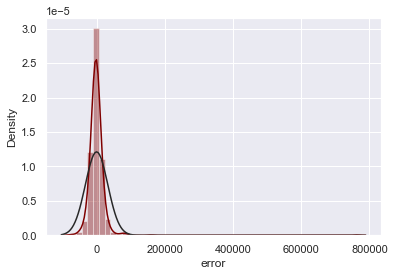

In [71]:
sns.distplot(df_y['error'], fit=norm, color= 'maroon');

In [62]:
mean_squared_error(y_train, y_train_predict) # Error medio cuadrado 

1083925912.3767178

In [63]:
# R2
model.score(X_train, y_train) 

0.16655291306292375

In [64]:
model = LinearRegression()
model.fit(X_test, y_test)

LinearRegression()

In [65]:
y_test_predict = model.predict(X_test)

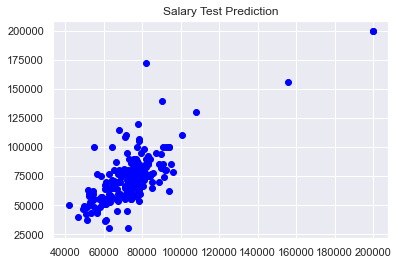

In [66]:
sns.set()
plt.scatter(y_test_predict, y_test, c='blue')
plt.title('Salary Test Prediction')
plt.show();